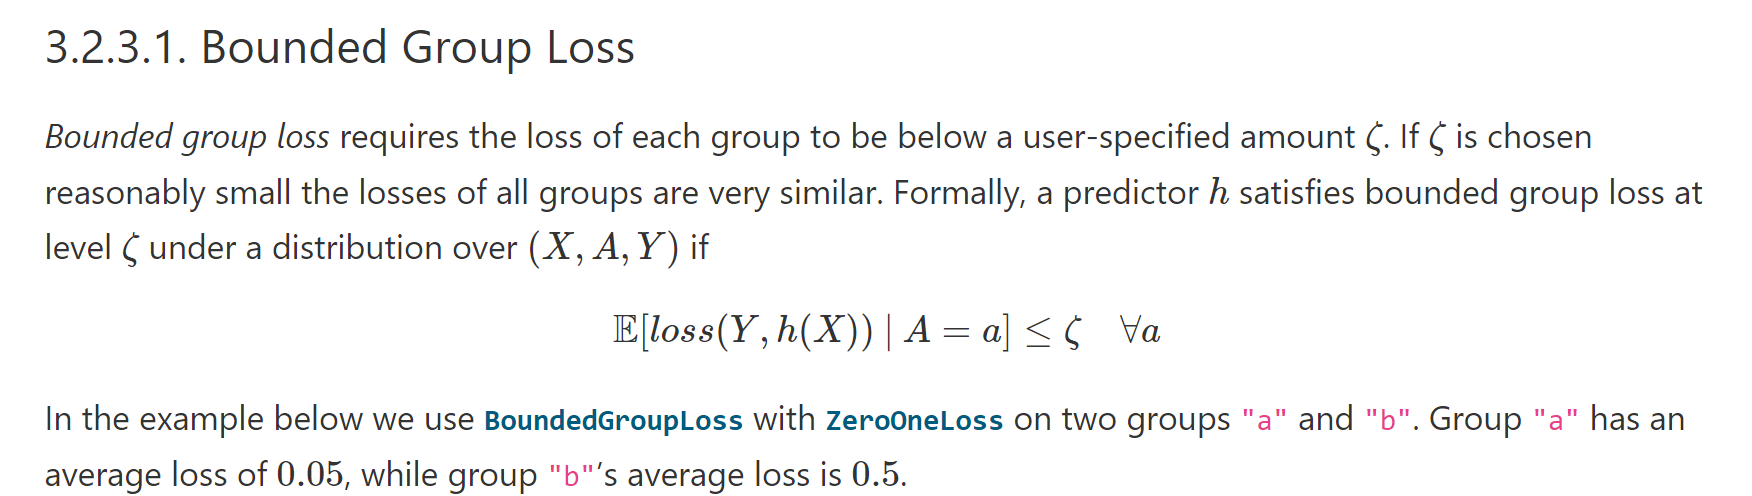

In [12]:
from fairlearn.reductions import BoundedGroupLoss, ZeroOneLoss
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
from fairlearn.metrics import (
    MetricFrame,
    true_positive_rate,
    false_positive_rate,
    false_negative_rate,
    selection_rate,
    count,
    false_negative_rate_difference
)

In [13]:
bgl = BoundedGroupLoss(ZeroOneLoss(), upper_bound=0.1)

In [14]:
X  = np.array([[0], [1], [2], [3]])

In [15]:
y_true  = np.array([0.3, 0.5, 0.1, 1.0])

In [16]:
y_pred  = np.array([0.3, 0.6, 0.6, 0.5])

In [17]:
sensitive_features = np.array(["a", "a", "b", "b"])

In [18]:
mae_frame = MetricFrame(mean_absolute_error,
                        y_true, y_pred,
                        sensitive_features=pd.Series(sensitive_features, name="SF 0"))

C:\Users\deepasaw\Anaconda3\lib\site-packages\fairlearn\metrics\_metric_frame.py:63: FutureWarning: You have provided 'metrics', 'y_true', 'y_pred' as positional arguments. Please pass them as keyword arguments. From version 0.10.0 passing them as positional arguments will result in an error.
  warnings.warn(f"You have provided {args_msg} as positional arguments. "


In [19]:
mae_frame.overall

0.275

In [20]:
mae_frame.by_group

SF 0
a    0.05
b     0.5
Name: mean_absolute_error, dtype: object

In [21]:
bgl.load_data(X, y_true, sensitive_features=sensitive_features)

In [22]:
bgl.gamma(lambda X: y_pred)

group_id
a    0.05
b    0.50
Name: loss, dtype: float64